# Processamento Digital de Imagens (Digital image processing) : Trabalho 1

> FGA/UnB - Universidade de Brasilia
Semestre: 01/2020
Data de entrega: 14/09/2020

**Dados do aluno**
- Bruna Medeiros da Silva
- Matrícula: 16/0048711

## Importando bibliotecas

In [1]:
import os
import cv2 as cv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. a

In [2]:
img_path = os.path.abspath('images/standard_test_images')
img_name = 'pirate.tif'
file = os.path.join(img_path, img_name)
img = cv.imread(file, 0)

In [3]:
img.shape

(512, 512)

In [4]:
print('Maximum value: %d\nMinimum value: %d' % (img.max(), img.min()))

Maximum value: 241
Minimum value: 36


## 1. b

### Using Matplotlib

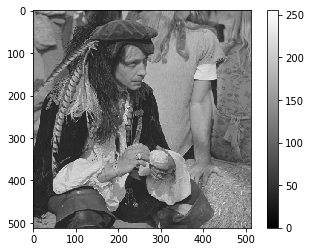

In [5]:
fig = plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.colorbar(fig)

### Using OpenCV

In [6]:
cv.imshow('1.b', img)
cv.waitKey(0)   
cv.destroyAllWindows()  

## 1. c

### 1. First attempt

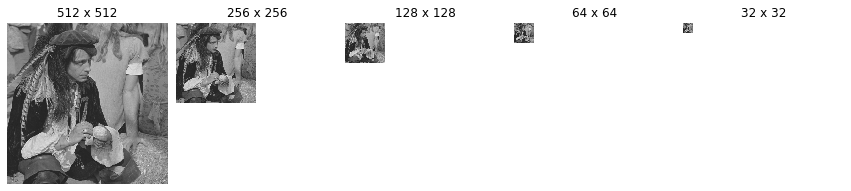

In [7]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    
    img = cv.imread(file, 0)
    fig, axs = plt.subplots(1, 5, figsize=[15, 15])
    fig.subplots_adjust(wspace=0.05)
    
    axs[0].axis('off')
    axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
    axs[0].set_title('%d x %d' % (size, size))
    
    for ax in axs[1:]:
        img[0 : int(size / 2), 0 : int(size / 2)] = img[0 : size : 2, 0 : size : 2]
        img[int(size / 2) : original_size, :] = 255
        img[:, int(size / 2) : original_size] = 255

        size = int(size / 2)
        
        ax.axis('off')
        ax.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        ax.set_title('%d x %d' % (size, size))        
        
        
downsample_512(img)

### 2. Second Attempt

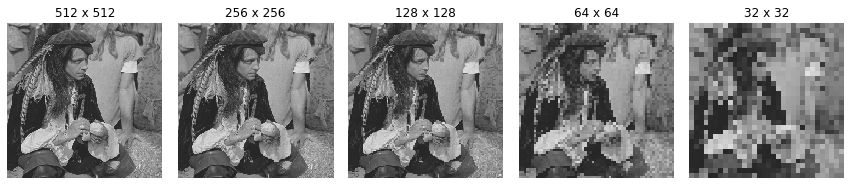

In [8]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    images = {}
    idx = 0
    
    img = cv.imread(file, 0)
    fig, axs = plt.subplots(1, 5, figsize=[15, 15])
    fig.subplots_adjust(wspace=0.1)
    
    axs[0].axis('off')
    axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
    axs[0].set_title('%d x %d' % (size, size))
    

    for ax in axs[1:]:
        img = img[0 : size : 2, 0 : size : 2]
        images[idx] = img
#         img[0 : int(size / 2), 0 : int(size / 2)] = img[0 : size : 2, 0 : size : 2]
#         img[int(size / 2) : original_size, :] = 255
#         img[:, int(size / 2) : original_size] = 255
        idx += 1
        size = int(size / 2)
        
        ax.axis('off')
        ax.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        ax.set_title('%d x %d' % (size, size))        
    return images
        
images = {}
images = downsample_512(img)


### 3. Third Attempt

In [10]:
def plot_original(img):
     # dots (pixels) per inch 
    dpi = int(os.popen('xdpyinfo | grep -w resolution | grep -Eo "[0-9]{1,}" | head -1').read())

    height, width = img.shape
    
    # With a screen with x pixels/inch and a image of y pixels
    # we need z = y/x [pixels/pixels/inch] = z inches to represent an image with its original size
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax  = fig.add_axes([0, 0, 1, 1]) 
    # Hide axis
    ax.axis('off')

    # Show final image
    ax.imshow(img, cmap='gray')

    plt.show()

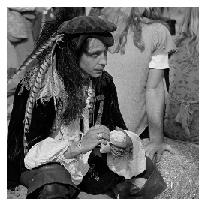

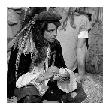

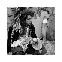

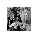

In [11]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    
    for ax in range(5):
        img = img[0 : size : 2, 0 : size : 2]
        size = int(size / 2)
        plot_original(img)
        
downsample_512(img)

## 1. d
### Nearest Neighbours

Método usado para interpolação, regreção e classificação que se utiliza da teoria de que amostras espacialmente próximas tendem a conter informações parecidas.

Com isso, o método de interpolação dos k vizinhos mais próximos em imagens 2D utiliza o valor dos k pixels mais próximos (com uma menor distância espacial) para definir o valor do pixel em questão.

Essa distância utilizada no cálculo é a distância euclidiana.

Recomenda-se utilizar valores de k **ímpares**, para evitar "empates" no momento de definir o valor adequado. No geral, são utilizados valores de $k = \sqrt{N}$ ou $k = \log{N}$, onde N é o número de amostras que você possui.

#### Processo para definição de índices e valores

> Esse método de obtençao dos índices corretos para o algoritimo de k vizinhos mais próximos pode ser encontrado [aqui](https://www.imageeprocessing.com/2017/11/nearest-neighbor-interpolation.html)

## 1. e

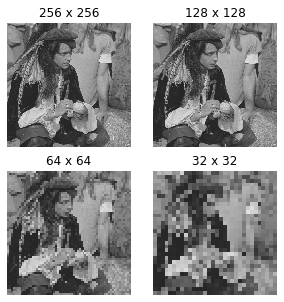

In [12]:
def knn_512(images):
    n_images = len(images)
    new_images = {}
    final_size = 512
    
    plot_row = 0
    plot_column = 0
    
    fig, axs = plt.subplots(2, round(n_images/2), figsize=[5, 5])
    fig.subplots_adjust(wspace=0.1)
    
    for idx in range(n_images):
        initial_size = len(images[idx])
        space = final_size / initial_size
        new_images_row = np.zeros([initial_size, final_size])
        new_images[idx] = np.zeros([final_size, final_size])

        new_images_idx = np.zeros([final_size, final_size])
        for row in range(initial_size):
            for column in range(final_size):
                new_images_idx[row][column] = int(column / space)
                new_images_row[row][column] = images[idx][row][int(new_images_idx[row][column])]

        new_images_idx = np.zeros([final_size, final_size])
        for column in range(final_size):
            for row in range(final_size):
                new_images_idx[row][column] = int(row / space)
                new_images[idx][row][column] = new_images_row[int(new_images_idx[row][column])][column]

        axs[plot_row][plot_column].axis('off')
        axs[plot_row][plot_column].imshow(new_images[idx], cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        axs[plot_row][plot_column].set_title('%d x %d' % (initial_size, initial_size))
        
        plot_column += 1
        if(plot_column == round(n_images/2)):
            plot_row += 1 
            plot_column = 0

    return new_images;
    
new_images = knn_512(images)

## 1.f. Interpolação Bilinear

[Fonte: SuperComputer's Blog](https://chao-ji.github.io/jekyll/update/2018/07/19/BilinearResize.html#:~:text=Like%20linearly%20resizing%20a%201,and%20x%20(width)%20dimension.)

Essa forma de interpolação pode ser aplicada em imagens (ou array) de duas dimensões (como x e y, por exemplo)

Para aplicar essa técnica são feitas duas interpolações lineares em sequência: aplica-se primeiro em uma das dimensões e, no resultado obtido, aplica-se na outra dimensão.

### Interpolação linear

<img src="https://chao-ji.github.io/assets/bilinear_interpolation/linear_interpolation.png" style="width:256px;"/>

A interpolação linear utiliza, se certa forma, uma média ponderada dos valores dos pixels mais próximos. Os pesos dessa média serão definidos pela distância total entre esses pixels.

**Exemplo:**


### Interpolação bilinear

<img src="https://chao-ji.github.io/assets/bilinear_interpolation/bilinear_resize.png" style="width:256px;"/>


Considerando que o processo visto acima poderá ser feito tanto em uma coluna quanto em uma linha, a interpolação bilinear é feita do seguinte modo:

1. Primeiro, considerando apenas a linha de cima da imagem e ignorando todo o resto, podemos fazer uma interpolação linear no eixo x de forma que:

\begin{equation}
    X = A \cdot \frac{x - x_1}{x_2 - x_1} + B \cdot \frac{x_2 - x}{x_2 - x_1}
\end{equation}

2. Fazendo o mesmo na linha de baixo:

\begin{equation}
    Y = C \cdot \frac{x - x_1}{x_2 - x_1} + D \cdot \frac{x_2 - x}{x_2 - x_1}
\end{equation}


3. Para encontrar Z, agora que temos os valores de X e Y, fazemos o mesmo procedimento no intervalo vertical entre eles:

\begin{equation}
    Z = X \cdot \frac{y - y_1}{y_2 - y_1} + Y \cdot \frac{y_2 - y}{y_2 - y_1}
\end{equation}


4. Observações:
    - Esse processo também pode ser feito de forma "direta" se substituirmos os valores de X e Y no cálculo de Z;
    - Nesse caso, considera-se que os eixo x e y crescem da esquerda pra direita e de cima para baixo, respectivamente.

<img src="https://chao-ji.github.io/assets/bilinear_interpolation/bilinear_resize.png" style="width:256px;"/>

## 1. g

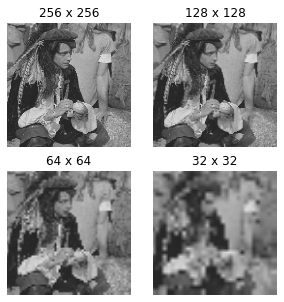

In [13]:
def bilinear_512(images):
    n_images = len(images)
    new_images = {}
    final_size = 512
    
    plot_row = 0
    plot_column = 0
    
    fig, axs = plt.subplots(2, round(n_images/2), figsize=[5, 5])
    fig.subplots_adjust(wspace=0.1)
    
    for img in range(n_images):
        initial_size = len(images[img])
        space = final_size / initial_size
        new_images[img] = np.zeros([final_size, final_size])
        
        for row in range(final_size):
            percent_row = row/space - math.floor(row/space)
            idx_row = math.ceil(row/space) if row/space < (initial_size - 1) else math.floor(row/space)
            
            for col in range(final_size):
                percent_col = col/space - math.floor(col/space)
                idx_col = math.ceil(col/space) if col/space < (initial_size - 1) else math.floor(col/space)
                
                x_floor = images[img][math.floor(row/space)][math.floor(col/space)]
                x_ceil  = images[img][math.floor(row/space)][idx_col]
                x = ((1 - percent_col) * x_floor) + (percent_col * x_ceil) 

                y_floor = images[img][idx_row][math.floor(col/space)]
                y_ceil  = images[img][idx_row][idx_col]
                y = ((1 - percent_col) * y_floor) + (percent_col * y_ceil) 

                new_images[img][row][col] = ((1 - percent_row) * x) + ((percent_row) * y)                   
        

        axs[plot_row][plot_column].axis('off')
        axs[plot_row][plot_column].imshow(new_images[img], cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        axs[plot_row][plot_column].set_title('%d x %d' % (initial_size, initial_size))
        
        plot_column += 1
        if(plot_column == round(n_images/2)):
            plot_row += 1 
            plot_column = 0

    return new_images;
    
new_images = bilinear_512(images)

## 1. h

### PSNR

PSNR é a sigla em inglês do termo *Peak Signal-to-Noise Ratio* (relação sinal-ruído de pico). Esse é uma medida que se utiliza do erro médio quadrático (MSE - *Mean squared error*) para calcular "a relação entre a máxima energia de um sinal e o ruído que afeta sua representação fidedigna". 

O PSNR geralmente é dado utilizando escala logarítima, em decibéis.

A fórmula para obtenção desse valor é:
![psnr.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/b9dd917e0c588410bcc6b59811850812ec1e0bb9)

Onde:
![mse.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/ffa9370a0bf87c4e0f1b02d6545b73940de984de)

In [14]:
def img_psnr(image, original_image):
    M = original_image.shape[0]
    N = original_image.shape[1]
    mse = 0
    
    for i in range(M):
        for j in range(N):
            mse = mse + abs(original_image[i][j] - image[i][j])**2
            
    mse = mse/(M * N)
    PSNR = 20 * math.log10(255/math.sqrt(mse))
    return PSNR

### Imagens reconstruídas usando KNN

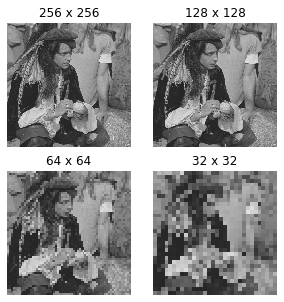

In [15]:
images_knn = knn_512(images)

### Imagens reconstruídas utilizando interpolação bilinear

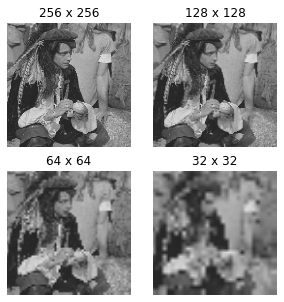

In [16]:
images_bilinear = bilinear_512(images)

In [17]:
dim = [256, 128, 64, 32]
psnr_df = pd.DataFrame(columns = ['size', 'psnr_knn_db', 'psnr_bilinear_db'])
for i in range(len(images_knn)):
    psnr_knn = img_psnr(images_knn[i], img)
    psnr_bilinear = img_psnr(images_bilinear[i], img)
    psnr_df = psnr_df.append({'size': '%d x %d'% (dim[i], dim[i]), 
                              'psnr_knn_db': '%.2f'% psnr_knn, 
                              'psnr_bilinear_db': '%.2f'% psnr_bilinear}, 
                               ignore_index=True)
psnr_df

,size,psnr_knn_db,psnr_bilinear_db
0,256 x 256,26.52,30.38
1,128 x 128,21.76,25.75
2,64 x 64,18.71,22.66
3,32 x 32,16.37,20.04


## 1.i.

Utilizando a psnr como métrica base, pode-se dizer que, para a imagem utilizada, o método de amplificação da imagem por meio interpolação bilinear se mostrou muito mais fiel às imagens originais (em todos os casos aqui experimentados) do que o método do vizinho mais próximo (knn)

## 1.j.

Se fôssemos fazer uma conversão de uma linha que vai de 0 a 255 para outra linha que vai de 0 a L, poderíamos seguir o seguinte raciocínio:

$y = ax + b$, onde

- y é o valor equivalente na linha L
- x é o valor original
- a é o coeficiente angular
- b é o coeficiente linear

Sabendo que o 0 será 0 em qualquer uma das retas:

$0 = a\cdot0 + b$. Logo, $b = 0$

Convertendo o ponto 255 para o ponto L:
$L = a\cdot255 $. Logo, $a = \frac{L}{255}$ e $\frac{1}{a} = \frac{255}{L}$.

Esse valor $\frac{1}{a}$ será o valor pelo qual dividiremos os valores dos pixels originais para obter o pixel dentro dos demais ranges propostos 

- 16 -> 4 bits, 
- 4 -> 2 bits e 
- 2 -> 1 bit.

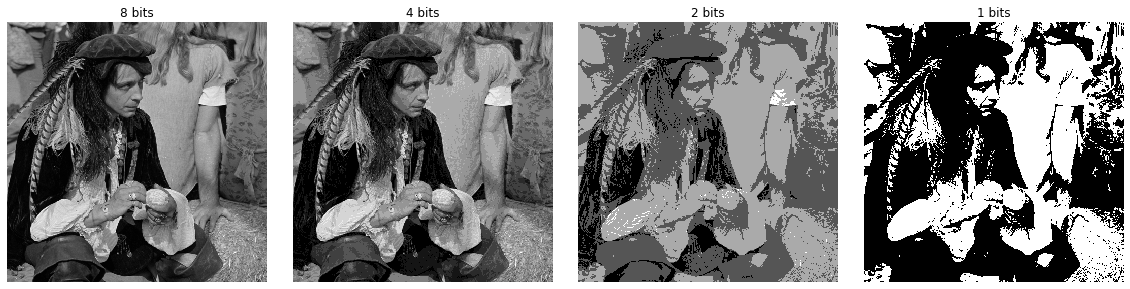

In [18]:
def img_scale(image):
    n_images = 4
    images = {}
    fig, axs = plt.subplots(1, n_images, figsize=[20, 20])
    fig.subplots_adjust(wspace=0.1)
    
    for idx in range(n_images):
        ratio = 255/(2**(2**idx) - 1)
        images[idx] = np.round(np.divide(image, ratio))

        axs[(n_images - 1) - idx].axis('off')
        axs[(n_images - 1) - idx].imshow(images[idx], cmap = 'gray', interpolation='none')
        axs[(n_images - 1) - idx].set_title('%d bits' % (2**idx))
            
img_scale(img)